In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import spearmanr

sns.set_theme(style="whitegrid", palette="deep")

Dataset content (from Kaggle)

Alongside the fields: Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, there are:-

Critic_score - Aggregate score compiled by Metacritic staff

Critic_count - The number of critics used in coming up with the Critic_score

User_score - Score by Metacritic's subscribers

User_count - Number of users who gave the user_score

Developer - Party responsible for creating the game

Rating - The ESRB ratings

In [2]:
COLORS = {
    'head': '#266292',
    'platform': {
        'DS': '#B15928', 
        'PC': '#A6CEE3', 
        'PS': '#B2DF8A', 
        'GBA': '#33A02C',
        'PS2': '#FB9A99',
        'PSP': '#FF7F00',
        'X360': '#CAB2D6',
        'PS3': '#6A3D9A',
        'Wii': '#DEDE99',
        'PS4': '#FDBF6F',
        'XOne': '#F561DD',
        'PSV': '#A48CF4',
        'WiiU': '#A157DB',
        '3DS': '#A6D854' 
    },
    'genre': {
        "Action": '#B15928', 
        "Adventure": '#A6CEE3', 
        "Fighting": '#B2DF8A', 
        "Misc": '#33A02C',
        "Platform": '#FB9A99',
        "Puzzle": '#FF7F00',
        "Racing": '#CAB2D6',
        "Role-Playing": '#6A3D9A',
        "Shooter": '#DEDE99',
        "Simulation": '#FDBF6F',
        "Sports": '#F561DD',
        "Strategy": '#A48CF4',
    },
    'rating': {
        'M': '#B15928',
        'отсутствует': '#A6CEE3',
        'E': '#33A02C', 
        'T': '#FF7F00', 
        'E10+': '#6A3D9A'
    }
}

In [39]:
data = pd.read_csv('data/video_games_sales.csv')
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


There are many NaN value and we also see that pandas has cast some columns to the wrong type. Let's prepare the data.

In [41]:
data.columns = map(
    str.lower, 
    data.columns
)

In [42]:
# Saving the DataFrame shape before dropping NaNs
size_before = data.shape[0]

# Removing rows with NaNs in the 'name' and 'genre' columns
data.dropna(
    subset=['name', 'genre', 'year_of_release'], 
    inplace=True
)

# Saving DataFrame shape after dropping NaNs
size_after = data.shape[0]

# Calculating % of lost data and display the result with two decimal places
print(f'We lost {1 - size_after / size_before:.2%} of data.')

We lost 1.62% of data.


The data loss is minimal and will not impact our conclusions. We will remove observations with missing values in the Name and Genre columns.

In [43]:
# convert the game release year to an integer format
data.year_of_release = data.year_of_release.astype('int')

# convert the user_score column to a float, but first, we'll replace 'tbd' values with NaN
print('Count of "tbd" in `user_score` - ', end=' ')
print(f'{data[data.user_score == "tbd"].shape[0]}')
data.user_score = data.user_score.map(
    lambda x: np.nan if x == 'tbd' else x
).astype('float')

Count of "tbd" in `user_score` -  2377


In [44]:
# Let’s check the proportion of missing values

data.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
publisher          0.001946
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
global_sales       0.000000
critic_score       0.514652
critic_count       0.514652
user_score         0.546267
user_count         0.546267
developer          0.397678
rating             0.406068
dtype: float64

We are filling the missing entries in the rating column with "unrated." The remaining missing values will be left as-is to avoid distorting statistical indicators. These missing values can likely be attributed to incomplete data or errors during data collection. We've also created a new variable, sales, to represent total sales across all regions.

In [10]:
data['sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Finally, we'll check for duplicate entries. We'll consider games with the same title, platform, and release year as duplicates and investigate if any exist. There is one duplicate case, and we will keep the first entry since the second has virtually no sales.

In [45]:
data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
604,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.11,0.22,0.0,0.23,2.56,83.0,22.0,5.5,101.0,EA Tiburon,E
16233,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.00,0.01,0.0,0.00,0.01,83.0,22.0,5.5,101.0,EA Tiburon,E


In [12]:
data.drop_duplicates(
    subset=['name', 'platform', 'year_of_release'], 
    keep='first', 
    inplace=True
)

### Data Preparation Summary
We removed missing values in the name, year_of_release, and genre columns. These accounted for less than 2% of the total observations, so this will not affect our conclusions. The year_of_release column was converted to the int type.

Both critic scores and user scores contain a significant proportion of missing data (over 50%), which we cannot remove. We also chose not to impute these missing values to avoid skewing the analysis. The year_of_release column has missing values in 2% of the observations. Instead of removing them, we will simply filter out these entries when analyzing games by release year or time trends.

More than 40% of the rating column entries were missing, which we replaced with "unrated." Additionally, about 2,500 entries in the user_score column were marked as 'tbd' (to be determined), and we replaced these with "unrated" as well.

We also created a new variable, sales, which represents the total sales across all regions.

## Exploratory Data Analysis

#### Analyzing Game Releases Over the Years

Let's examine how many games were released in different years.

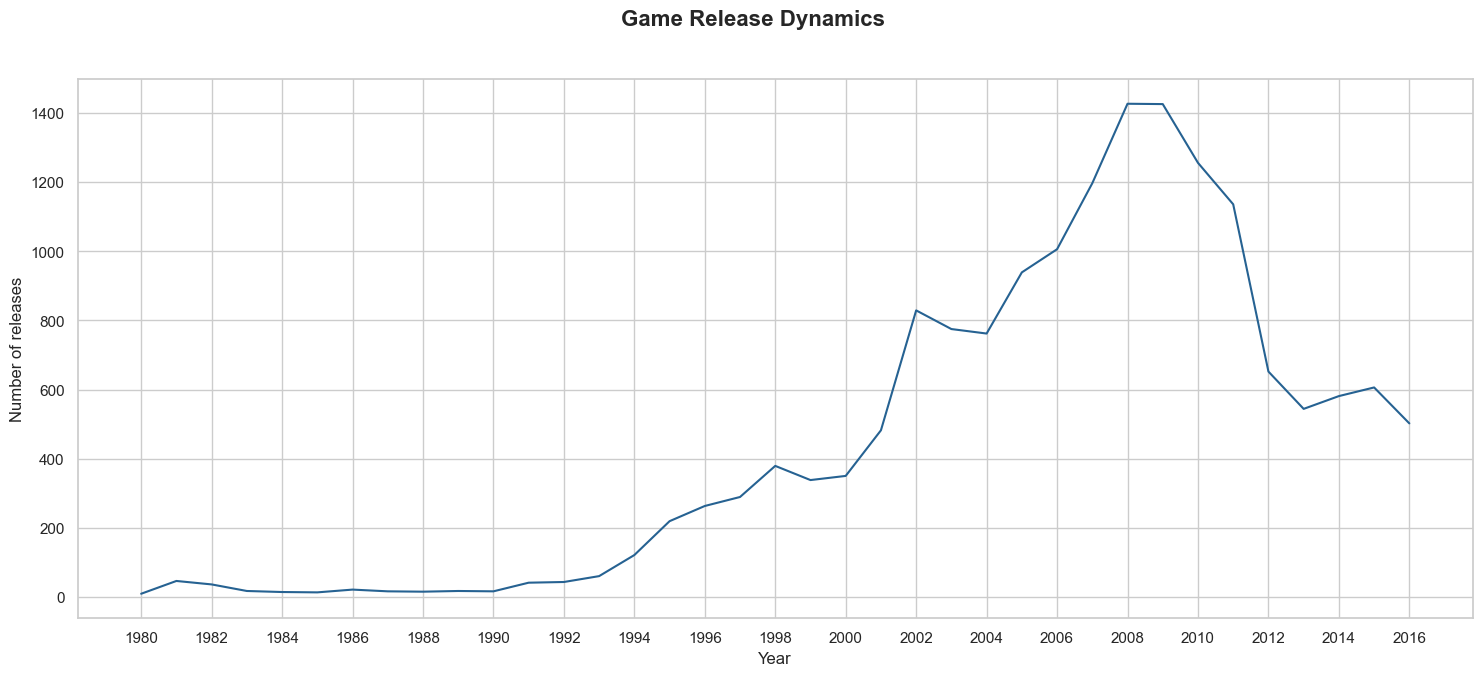

In [13]:
# create a figure and axis for the plot.
fig, ax = plt.subplots(figsize=(18, 7))

# The data is grouped by release year, and we calculate the number of unique game titles.
df = data.groupby('year_of_release')['name'].count()

# A line chart
sns.lineplot(
    x=df.index, 
    y=df, 
    ax=ax, 
    color=COLORS['head']
)

# title to the plot
plt.suptitle(
    'Game Release Dynamics', 
    fontsize=16, 
    fontweight="bold"
)

# Labels to the X and Y axes
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of releases', fontsize=12)

# The number of ticks on the X-axis
plt.locator_params(axis='x', nbins=20)

# display the chart
plt.show()

The data shows game releases from 1980 to 2016. Before 2000, the games were quite different from modern ones due to limitations in hardware performance and the development of the gaming industry. Now, let's explore how sales evolved across different platforms.

* Sales Dynamics by Platform
1. We filter the top 10 platforms by total sales over the entire period.
2. The data is grouped by platform and year.
3. A line plot is created to show sales dynamics by platform.

In [14]:
top = 10
top_platform = data.groupby(
    ['platform']
).sales.sum().sort_values(ascending=False)[:top]
top_platform

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: sales, dtype: float64

In [15]:
df = data[
    data.platform.isin(top_platform.index)
].groupby(
    ['year_of_release', 'platform']
).sales.sum().to_frame().reset_index()

In [16]:
def plot_sales(data, years=20, ylim=None) -> None:

    # figure and axis for the plot
    fig, ax = plt.subplots(figsize=(18, 7))

    # Plot lines with different colors representing the platforms
    sns.lineplot(
        data=data, 
        x='year_of_release', 
        y='sales', 
        hue='platform', 
        palette=COLORS['platform']
    )

    # title to the plot
    plt.suptitle(
        'Sales Dynamics by Platform', 
        fontsize=16, 
        fontweight="bold"
    )

    # Add labels to the X and Y axes
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Sales (mln. of copies)', fontsize=12)

    # the number of ticks on the X-axis
    plt.locator_params(axis='x', nbins=years)

    # Add a legend with the title 'Platform'
    plt.legend(title='Platform')

    # Set the range for the Y-axis
    if ylim:
        plt.ylim(0, ylim)

    # Display the chart
    plt.show()

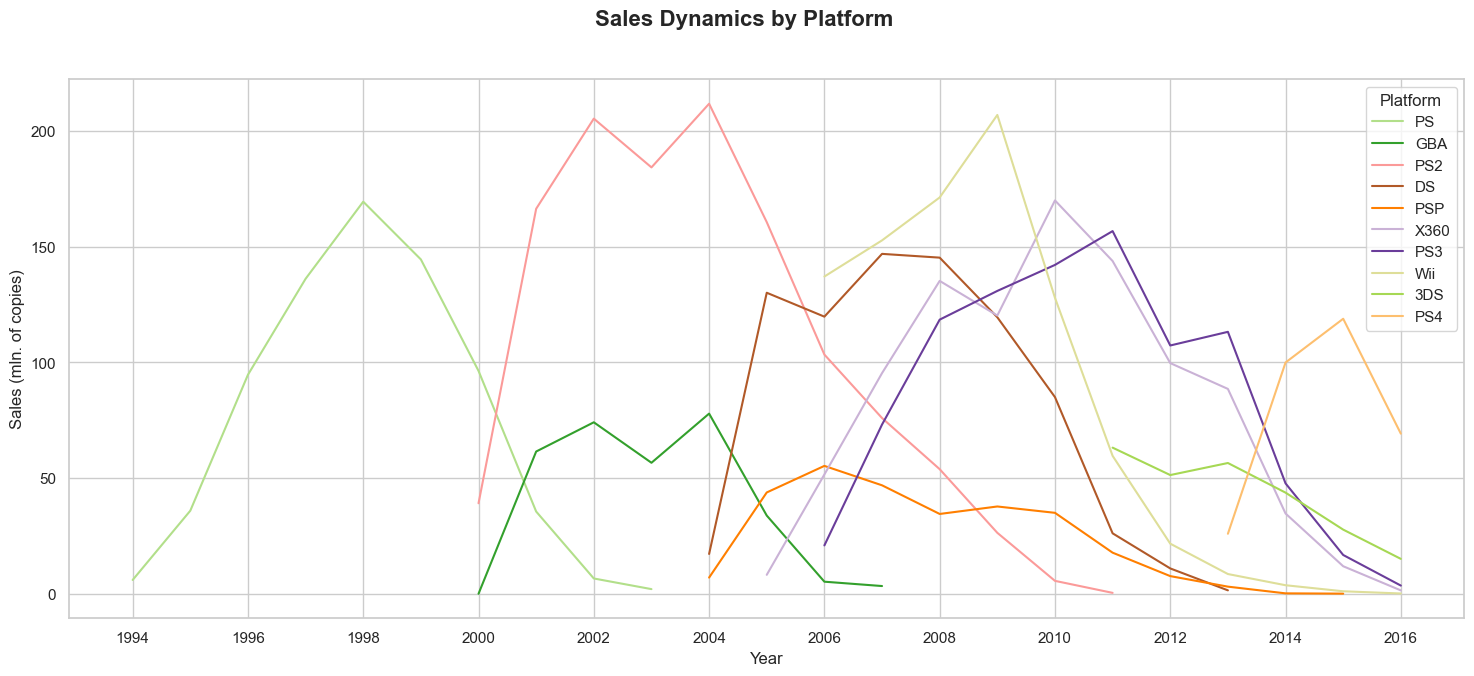

In [17]:
plot_sales(df)

We can observe that games for top platforms typically have strong sales for 3-5 years. PC games, on the other hand, have been selling throughout the entire observation period, with a peak in 2011. However, they have not gained widespread popularity, likely due to the availability of free pirated copies online.

The popularity of genres also changes over time, so for further analysis, we will focus on the most recent four years. Additionally, there are DS console games listed as released in 1985—let’s take a closer look at those.

In [18]:
data[(data.year_of_release == 1985) & (data.platform == 'DS')]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,sales


This is a data error. The game in question was actually released in 2010, so we will correct the mistake.

In [19]:
data.loc[(data.year_of_release == 1985) & (data.platform == 'DS'), 'year_of_release'] = 2010

Now, let's look at which platforms have been popular in the last four years and analyze the lifecycle of these platforms.

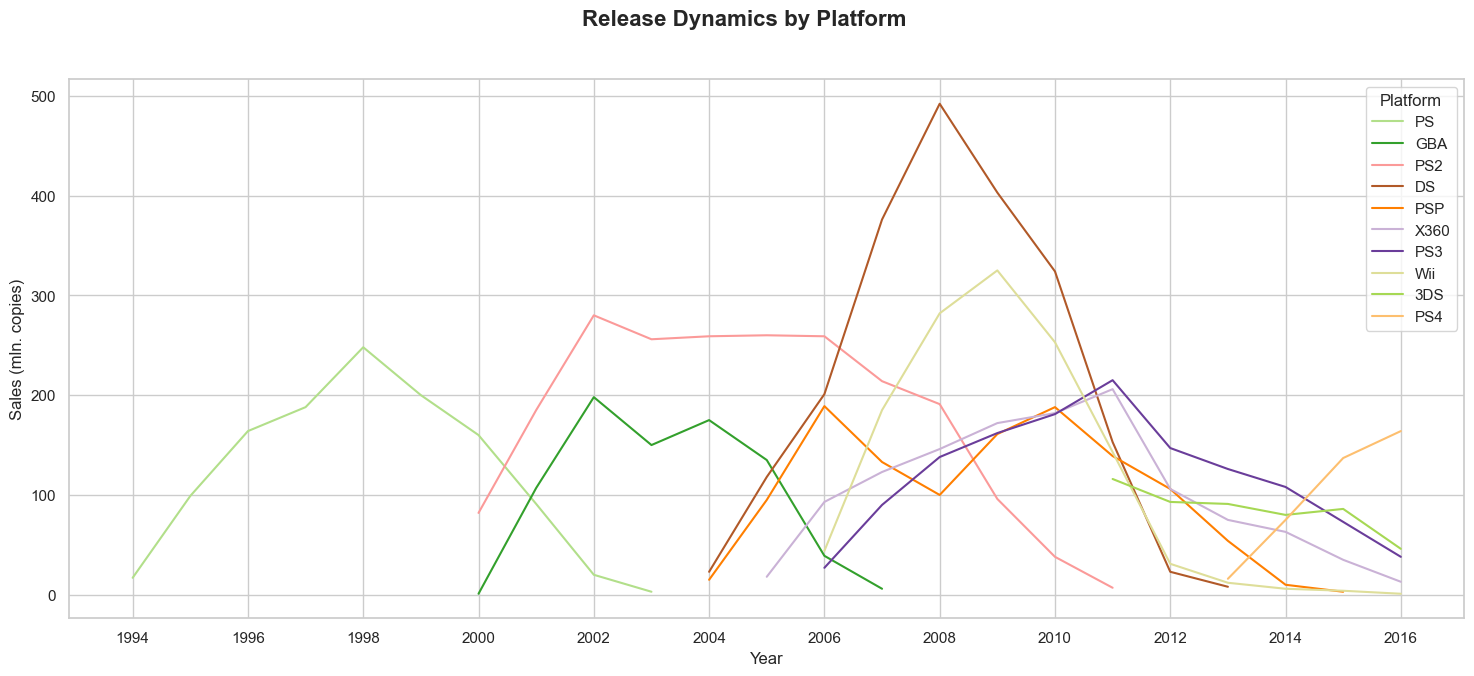

In [20]:
# The data is grouped by platform and year
df = data[
    data.platform.isin(top_platform.index)
].groupby(
    ['year_of_release', 'platform']
).name.count().to_frame().reset_index()

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(18, 7))

# Plot lines with different colors representing the platforms
sns.lineplot(
    data=df, 
    x='year_of_release', 
    y='name', 
    hue='platform', 
    palette=COLORS['platform']
)

# Add a title to the plot
plt.suptitle(
    'Release Dynamics by Platform', 
    fontsize=16, 
    fontweight="bold"
)

# Add labels to the X and Y axes
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales (mln. copies)', fontsize=12)

# Set the number of ticks on the X-axis
plt.locator_params(axis='x', nbins=20)

# Add a legend with the title 'Platform'
plt.legend(title='Platform')

# Display the chart
plt.show()

The chart shows that games are released for a platform for around 10 years. The gaming industry is facing challenging times. We have three leading platforms: PS4, XOne, and 3DS, with PS4 outselling its closest competitor by more than twofold. In 2015, sales were growing on both PS4 and XOne, but since our 2016 data is incomplete, we cannot draw conclusions about the trend for that year. Sales for the 3DS platform have been declining since 2013, leaving us with two potentially profitable platforms: PS4 and XOne.

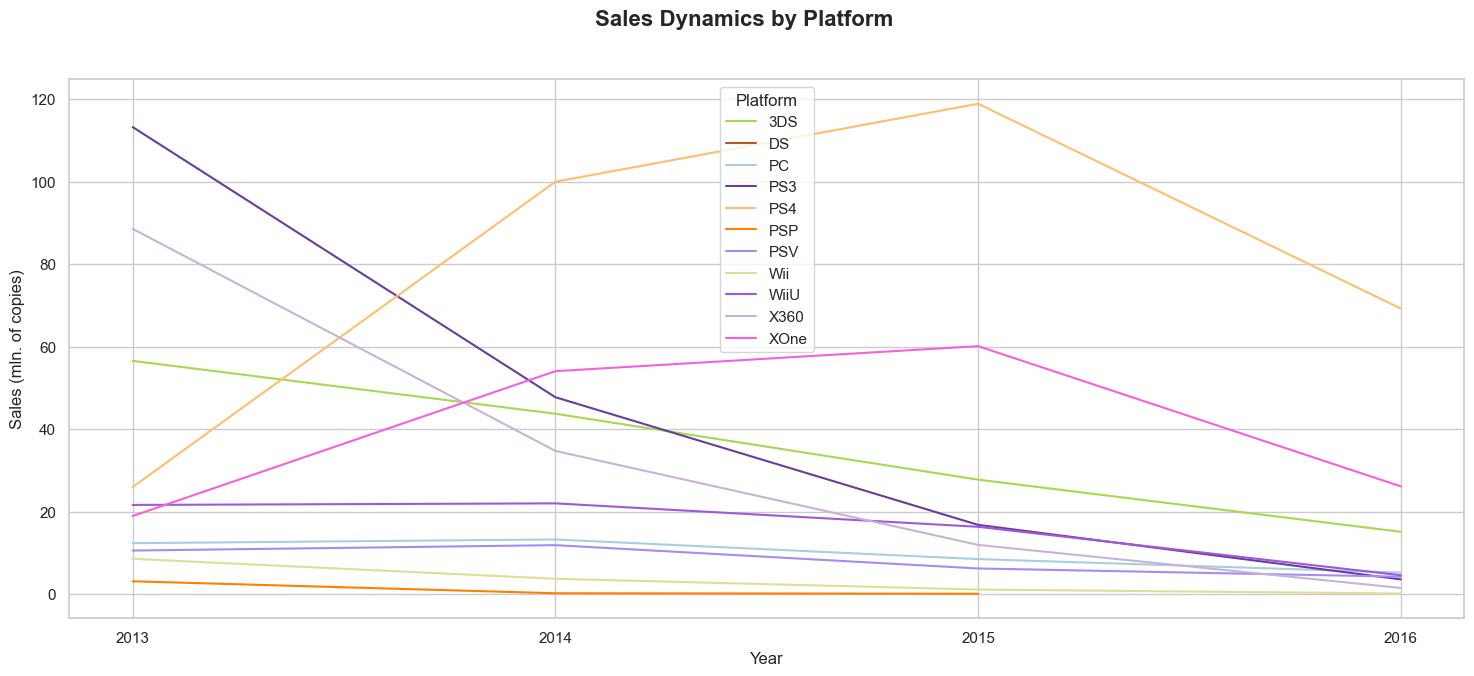

Top platforms of 2015-2016


platform
PS4     188.15
XOne     86.29
3DS      42.92
Name: sales, dtype: float64

In [21]:
# Filtering and grouping by platform and release year
year = 2013
data_after_year = data[data.year_of_release >= year]
df = data_after_year.groupby(
    ['platform', 'year_of_release']
).sales.sum().to_frame().reset_index()

# plotting
plot_sales(df, years=5)

# Top-3 platforms
print('Top platforms of 2015-2016')
data[data.year_of_release > 2014].groupby(
    'platform'
).sales.sum().sort_values(ascending=False)[:3]

Next, we'll create a box plot to visualize global game sales across different platforms.

In [22]:
def box_plot_mean(data: pd.DataFrame, hue: str, *, suptitle: str, ylabel: str) -> None:
    # Sorting platforms by median sales
    sort_platforms = (
        data.groupby(hue)
       .sales.median()
       .sort_values(ascending=False)
       .index
    )

    # Create a figure with two subplots
    fig, ax = plt.subplots(
        nrows=1, ncols=2, sharex=False, 
        gridspec_kw={"width_ratios": (.8,.2)},
        figsize=(18, 10)
    )

    # Boxplot for sales and platforms
    sns.boxplot(
        data=data, 
        x='sales', 
        y=hue, 
        order=sort_platforms, 
        ax=ax[0], 
        palette=COLORS[hue]
    )

    # average sales by platform
    means = data.groupby(hue).sales.mean()

    # bar chart for average sales by platform
    sns.barplot(
        x=means, 
        y=means.index, 
        order=sort_platforms, 
        ax=ax[1], 
        palette=COLORS[hue]
    )

    # X-axis lim for the 1st plot
    ax[0].set_xlim(0, 4)

    # Main title
    plt.suptitle(
        suptitle, 
        fontsize=16, 
        fontweight="bold"
    )

    # Plot titles
    ax[0].set_title('"Box plot"', fontsize=14)
    ax[1].set_title('Distribution of means', fontsize=14)

    # axis titles
    ax[0].set_xlabel('Sales (mln. copies)', fontsize=12)
    ax[0].set_ylabel(ylabel, fontsize=12)
    ax[1].set_xlabel('Sales (mln. copies)', fontsize=12)
    ax[1].set_ylabel('', fontsize=12)

    # Display 
    plt.show()

C:\Users\pugaeva.ea\AppData\Local\Temp\ipykernel_3720\3604125499.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\pugaeva.ea\AppData\Local\Temp\ipykernel_3720\3604125499.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


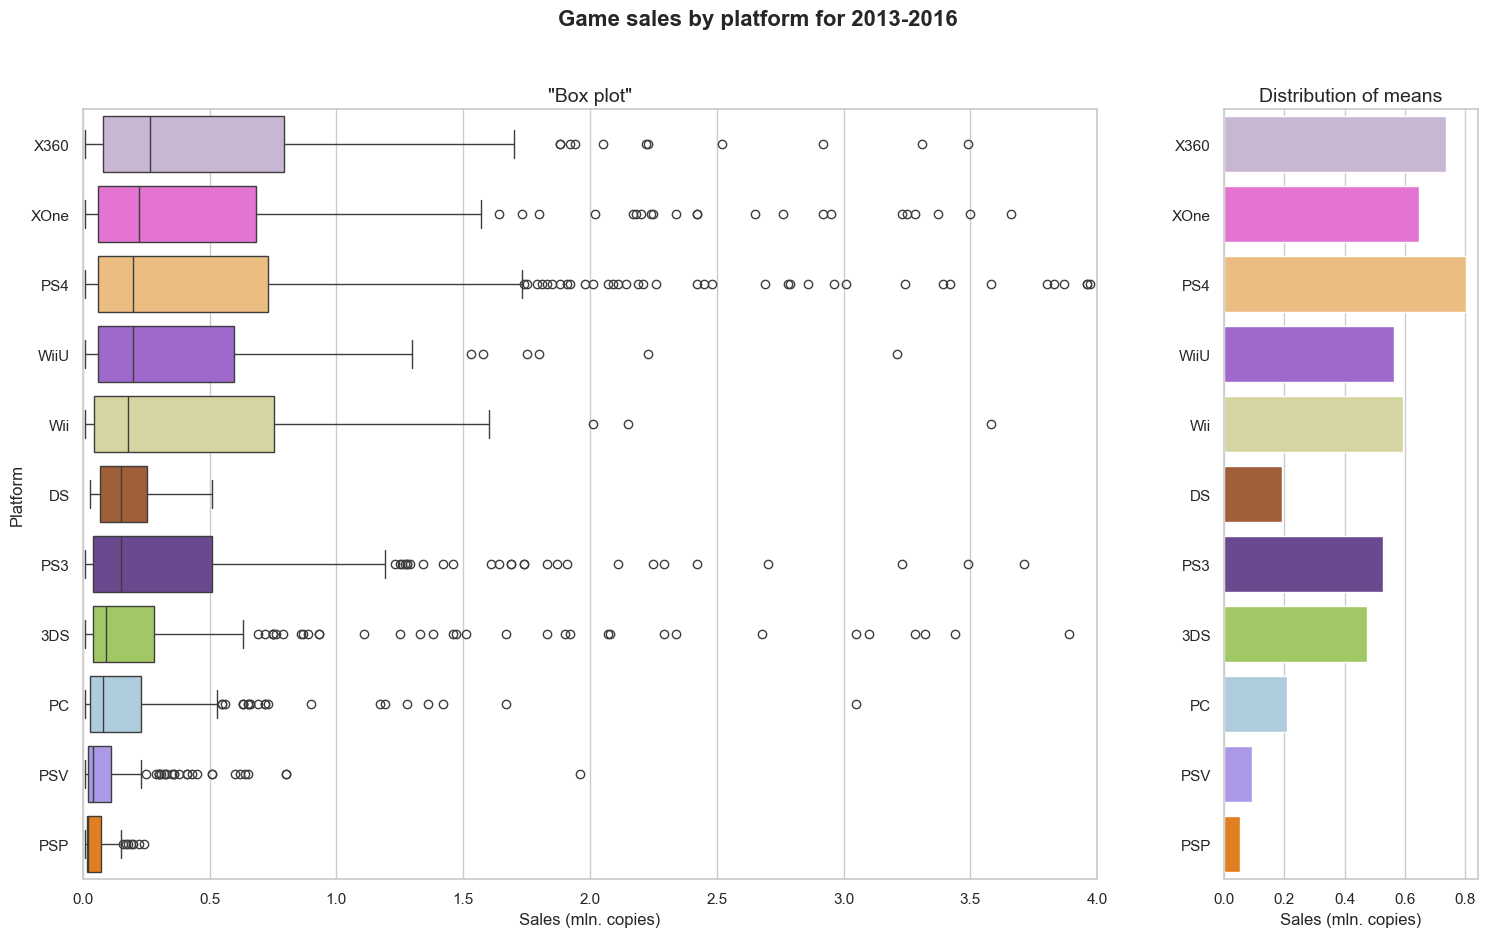

In [23]:
box_plot_mean(
    data_after_year, 
    hue='platform',
    suptitle='Game sales by platform for 2013-2016', 
    ylabel='Platform'
)

The box plots are sorted by median sales. On the right side of the chart, we can observe how average sales are distributed across platforms. Interestingly, the median sales for XOne games are higher than those for PS4, suggesting that, on average, games on the XOne platform sell better than those on PS4. However, we are more interested in top-selling games rather than average ones.

Looking at the distribution of averages, we see that the mean sales for PS4 games are higher than for XOne, indicating that PS4 games have a longer right tail in the sales distribution. The box plot also reveals that PS4 games have significantly more outliers, meaning there are more blockbuster hits on the PS4 platform.

Finally, we will explore how sales are influenced by critic and user ratings. We'll take the top 5 most popular platforms and create scatter plots to analyze the relationship.

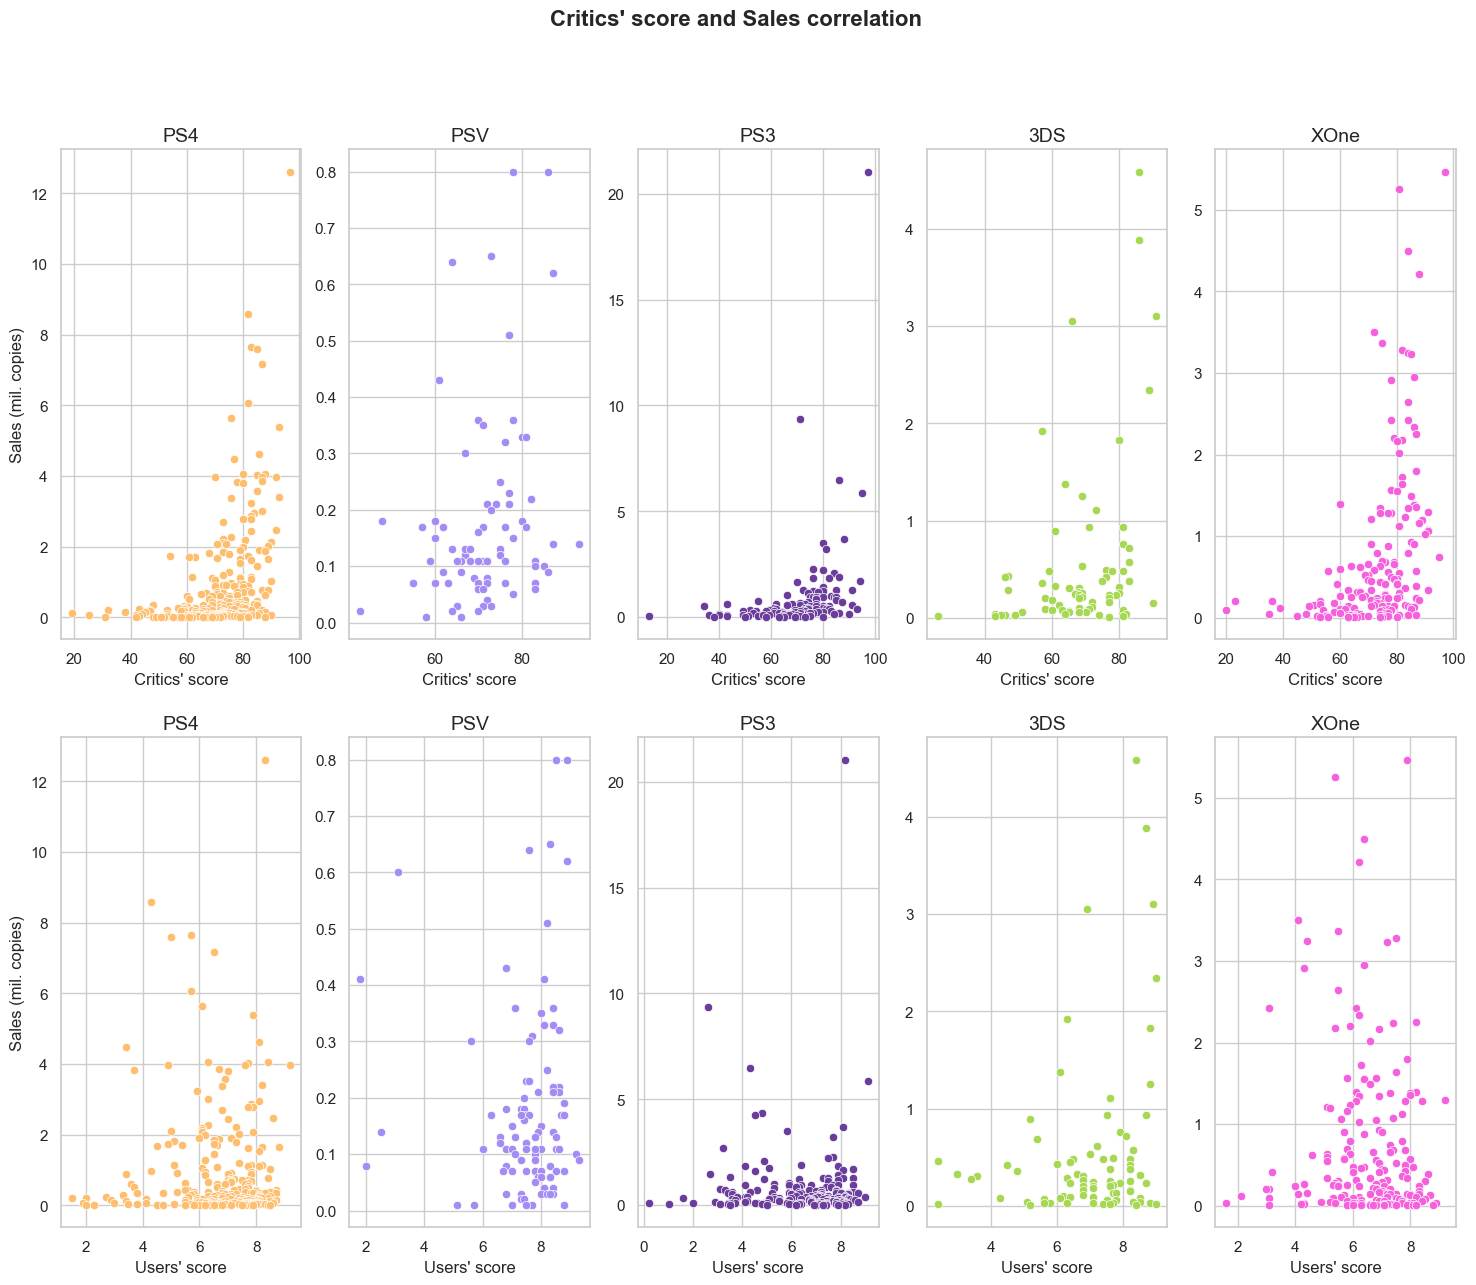

In [24]:
# Finding the top 5 popular platforms
top_platform = data_after_year.groupby(
    'platform'
).name.count().sort_values(ascending=False).index[:5]

# Creating a figure with 2x2 subgraphs
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(18, 14), sharex=False)

# Plotting correlation of critics_score and sales
for i, platform in enumerate(top_platform):
    df = data_after_year[data_after_year.platform == platform]
    
    sns.scatterplot(
        data=df, 
        x='critic_score',
        y='sales', 
        ax=ax[0, i], 
        color=COLORS['platform'][platform]
    )
    
    sns.scatterplot(
        data=df, 
        x='user_score', 
        y='sales', 
        ax=ax[1, i], 
        color=COLORS['platform'][platform]
        
    )

# Axis labels
for i, platform in enumerate(top_platform):
    ax[0, i].set_xlabel("Critics' score")
    ax[1, i].set_xlabel("Users' score")
    if i > 0:
        ax[1, i].set_ylabel('')
        ax[0, i].set_ylabel('')
    else:
        ax[1, 0].set_ylabel('Sales (mil. copies)')
        ax[0, 0].set_ylabel('Sales (mil. copies)')
    # Titles
    ax[0, i].set_title(platform, fontsize=14)
    ax[1, i].set_title(platform, fontsize=14)

# Main title
plt.suptitle("Critics' score and Sales correlation", fontsize=16, fontweight="bold")

# Display
plt.show()

We observe a clear relationship between game sales on popular platforms and critic ratings, but no such correlation is evident for user ratings. Since our data contains significant outliers and the relationship doesn't appear to be linear, we will calculate the Spearman correlation and conduct a statistical test to determine whether this correlation is significant.

In [25]:
def test_spearman(platform, score) -> None:
    """
    Tests the Spearman correlation between sales and score on a given platform.

    Args:
        platform (str): platform name.
        score (str): scores column.

    Returns:
        None
    """
    # Calculates the Spearman correlation between sales and ratings
    corr, pvalue = spearmanr(platform['sales'], platform[score])

    # Displays Spearman correlation value
    print(f'Spearman correlation score - {corr:.2f}')

    # Check the significance of the correlation
    if pvalue > 0.05:
        # If the correlation is not significant:
        print('There is no evidence of a relationship between the variables.')
    else:
        # If the correlation is significant:
        print(f'The correlation is statistically significant.')

In [26]:
# Next, we iterate through each of the popular platforms to calculate these statistics
for platform in top_platform:
    
    df = data_after_year[data_after_year.platform == platform].dropna()
    print(f'Platform - ~{platform}~')
    print('-'*40)
    print("Critics' score")
    print('-'*40)
    test_spearman(df, 'critic_score')
    print('-'*40)
    print("Users' score")
    print('-'*40)
    test_spearman(df, 'user_score')
    print('-'*40)
    print()

Platform - ~PS4~
----------------------------------------
Critics' score
----------------------------------------
Spearman correlation score - 0.50
The correlation is statistically significant.
----------------------------------------
Users' score
----------------------------------------
Spearman correlation score - -0.03
There is no evidence of a relationship between the variables.
----------------------------------------

Platform - ~PSV~
----------------------------------------
Critics' score
----------------------------------------
Spearman correlation score - 0.28
The correlation is statistically significant.
----------------------------------------
Users' score
----------------------------------------
Spearman correlation score - 0.19
There is no evidence of a relationship between the variables.
----------------------------------------

Platform - ~PS3~
----------------------------------------
Critics' score
----------------------------------------
Spearman correlation score - 0.

Based on the test results, we can confidently conclude that there is a significant correlation between game sales and critic ratings. This suggests that the higher the critic rating, the more likely the game is to be a top-seller. However, we did not find any significant relationship between user ratings and sales.

### Genre Distribution Analysis

C:\Users\pugaeva.ea\AppData\Local\Temp\ipykernel_3720\2444494182.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


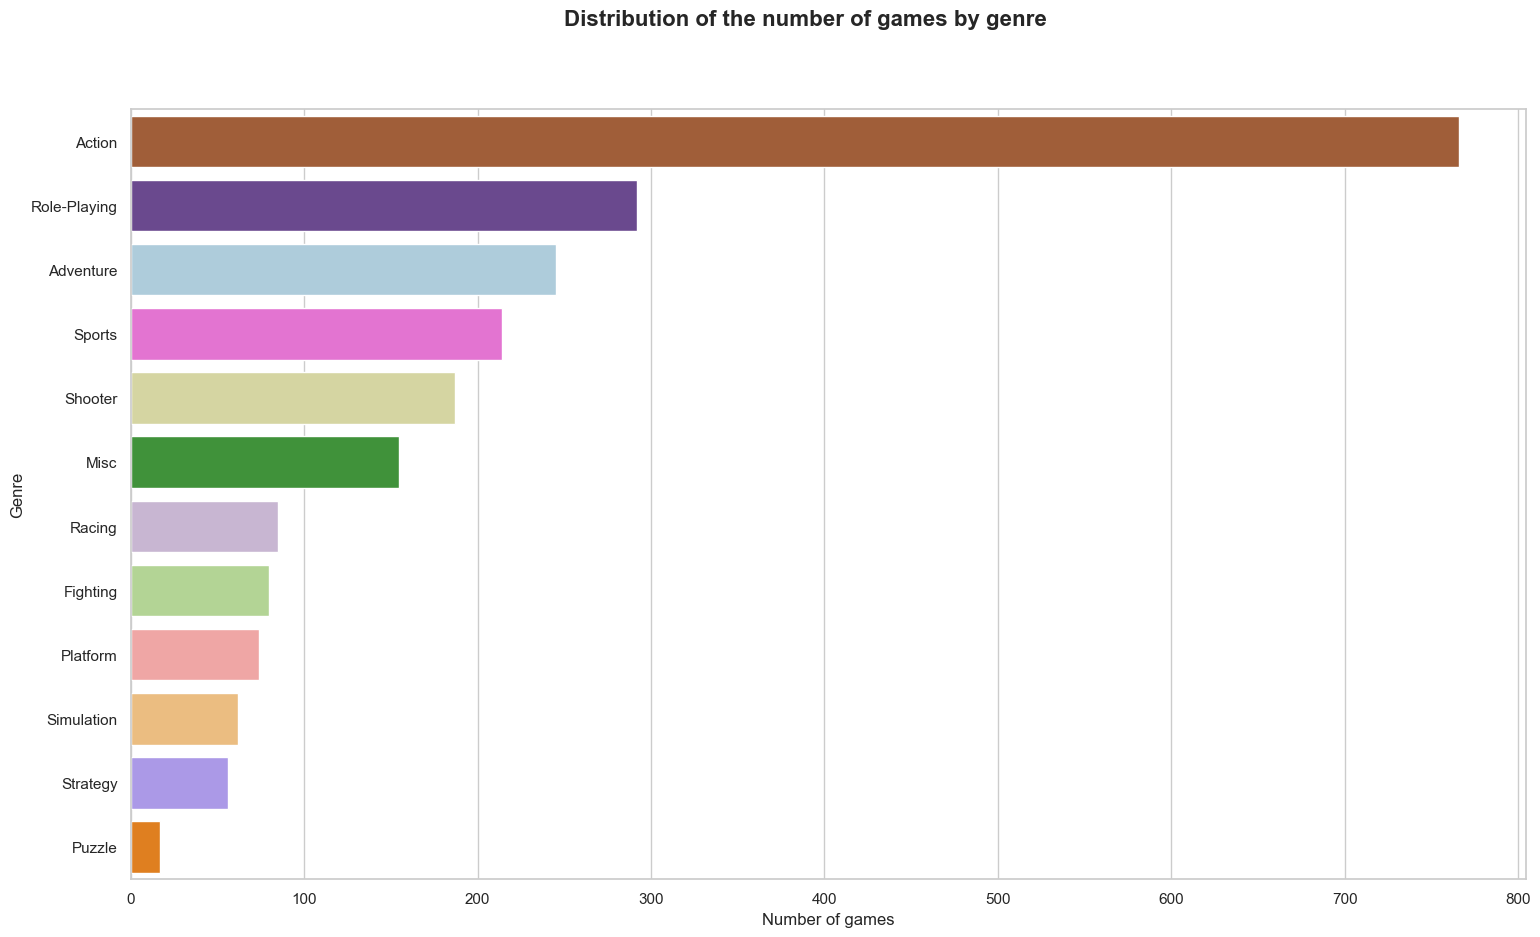

In [27]:
# Create a figure and plot
fig, axs = plt.subplots(figsize=(18, 10))

# Create a list of genres in descending order of the number of games
genres = data_after_year.groupby(
    'genre'
).name.count().sort_values(ascending=False).index

# Plotting the number of games by genre
sns.countplot(
    data=data_after_year, 
    y='genre', 
    palette=COLORS['genre'], 
    order=genres
)

# Title
plt.suptitle(
    "Distribution of the number of games by genre", 
    fontsize=16, 
    fontweight="bold"
)

# Axis labels
plt.xlabel('Number of games')
plt.ylabel('Genre')

# Display 
plt.show()

The Action genre leads by a significant margin. Let's now examine how sales are distributed across different genres.

C:\Users\pugaeva.ea\AppData\Local\Temp\ipykernel_3720\3604125499.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\pugaeva.ea\AppData\Local\Temp\ipykernel_3720\3604125499.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


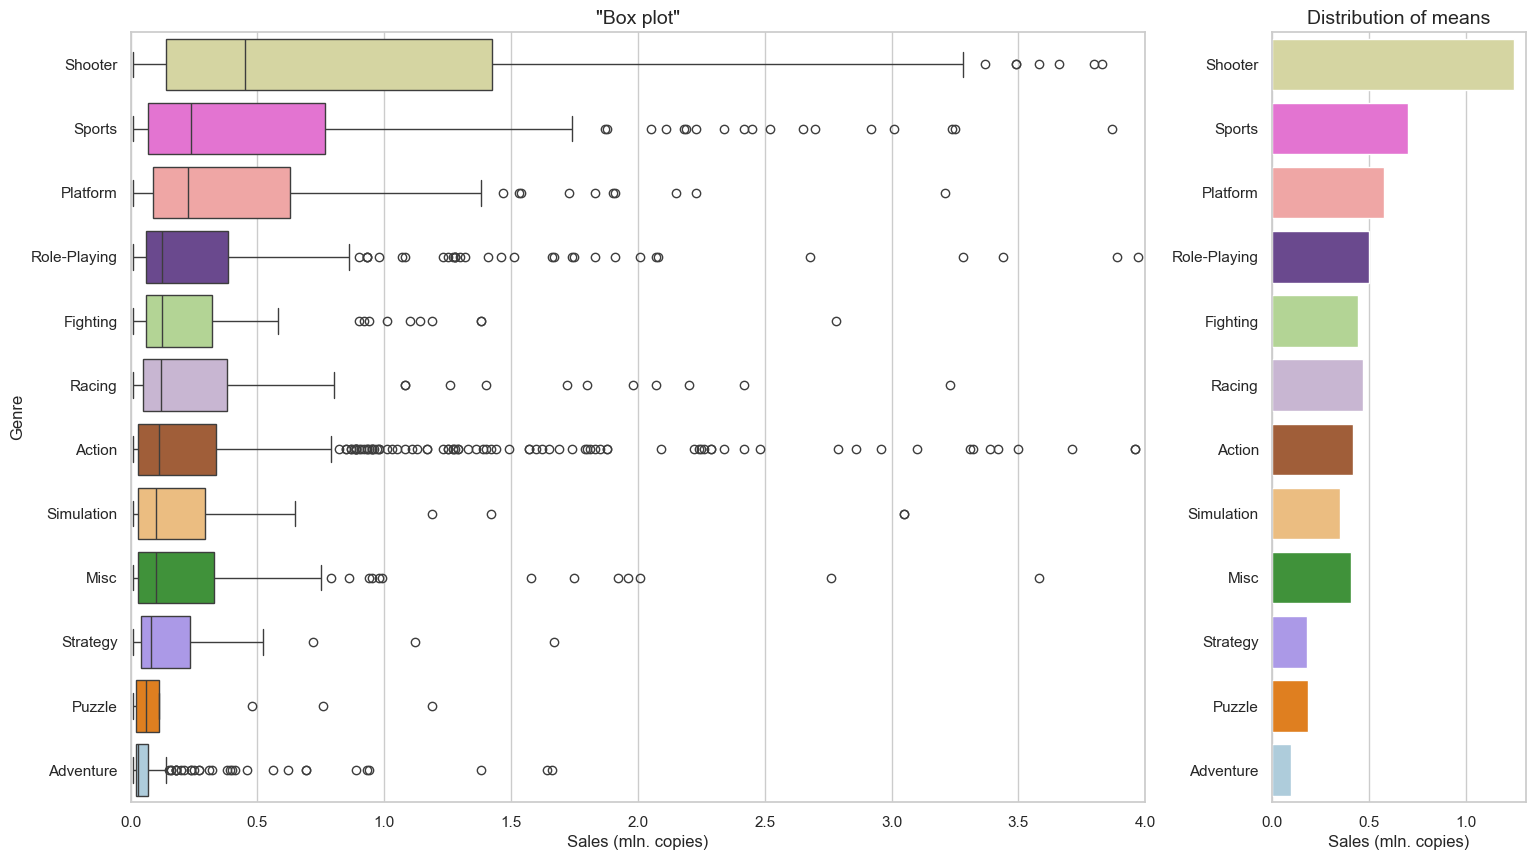

In [28]:
box_plot_mean(
    data_after_year,
    hue='genre',
    suptitle='',
    ylabel='Genre'
)

We can see that shooters unquestionably sell the best. Additionally, sports games and platformers also rank among the most in-demand genres. On the other hand, the three lowest-selling genres are adventure, puzzle, and strategy games.

### Exploratory Data Analysis Summary
The dataset contains games released between 1980 and 2016. The analysis reveals that popular platforms typically have an active lifecycle of 3-5 years before a new generation of consoles emerges. The most popular platforms in recent years are XOne and PS4, both released in 2013. Therefore, we will focus on data from 2013 to 2016 for further analysis.

In 2014 and 2015, sales on these top platforms were growing. Although our chart shows a slight decline in 2016, this could be due to incomplete data for that year.

Sales analysis indicates that blockbuster games are more frequent made for PS4. We also identified a strong correlation between critic ratings and game sales: the higher the critic rating, the more likely a game is to be a top-seller.

The top three genres with the most popular games are shooters, sports games, and platformers. Conversely, adventure, puzzle, and strategy games have the fewest top-selling titles.

### Customer profile

In [29]:
def display_table(data: pd.DataFrame, *, hue: str, index_name: str) -> None:
    """
    Generates a sales pivot table based on a specified feature.

    Args:
    data (DataFrame):  The data for analysis.
    hue (str): The feature by which the table will be grouped.
    index_name (str): The name of the table's index.

    Returns:
    None
    """

    # Creates a pivot table by platforms
    sales_platform = data_after_year.pivot_table(
        index=hue, # Rows
        values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales','sales'], # Columns
        aggfunc='sum'  # The aggregation function is sum
    )

    # Normalizes the table values by the total sales
    sales_platform = (
        sales_platform / sales_platform.sum()
    ).sort_values(by='sales', ascending=False)

    # Renames the index and columns
    sales_platform.index.name = index_name
    sales_platform.columns = [
        'Europe', 
        'Japan', 
        'North America', 
        'Other', 
        'All'
    ]

    # Display the table with proper formatting
    display(
        sales_platform.style.format("{:.2%}")
       .background_gradient(cmap='Reds')
    )

Now, let’s examine how platform sales are distributed across different regions.

In [30]:
display_table(
    data_after_year, 
    hue='platform', 
    index_name='Platform'
)

,Europe,Japan,North America,Other,All
Platform,,,,,
PS4,35.97%,11.34%,24.84%,40.30%,28.80%
PS3,17.29%,16.59%,14.51%,22.31%,16.63%
XOne,13.15%,0.24%,21.27%,11.89%,14.61%
3DS,7.89%,48.17%,8.73%,5.23%,13.13%
X360,10.84%,0.36%,18.66%,10.09%,12.54%
WiiU,5.06%,7.73%,6.67%,3.91%,5.93%
PC,6.47%,0.00%,2.54%,2.47%,3.62%
PSV,1.56%,13.21%,1.15%,2.72%,3.02%
Wii,1.51%,0.04%,1.50%,0.93%,1.25%


It is immediately clear that Japanese users differ significantly from the rest. In Japan, almost half of the sales come from the portable console 3DS, and over 13% from the portable console PSV. Additionally, nearly 8% of sales in Japan are for WiiU, which can also be used as a portable console. This indicates that Japanese players have a strong preference for portable consoles, with the 3DS being especially popular. Japanese users barely purchase PC games.

In Europe, similar to other regions, the most popular console is the PS4. It's worth noting that 6.5% of sales in Europe are for PC, while in other regions, this platform accounts for about 2.5%. In North America, the XOne has nearly the same share of sales as the PS4.

Next, let's look at the popularity of game genres across various regions.

In [31]:
display_table(
    data_after_year, 
    hue='genre', 
    index_name='Genre'
)

,Europe,Japan,North America,Other,All
Genre,,,,,
Action,30.12%,28.76%,28.80%,31.01%,29.51%
Shooter,22.40%,4.70%,25.07%,23.98%,21.36%
Sports,15.43%,3.84%,14.91%,16.21%,13.81%
Role-Playing,9.43%,36.26%,10.60%,9.57%,13.38%
Misc,5.11%,6.54%,6.28%,5.08%,5.76%
Platform,3.97%,3.40%,4.14%,3.43%,3.91%
Racing,5.15%,1.63%,2.96%,3.70%,3.66%
Fighting,2.18%,5.43%,3.55%,2.97%,3.24%
Adventure,2.10%,4.13%,1.63%,2.03%,2.17%


Once again, Japanese players stand out significantly. Their favorite genre is Role-Playing, which accounts for more than a third of all sales in Japan. Japanese players are not particularly fond of shooters, and fighting games sell slightly better than in other regions. In all other regions, the most popular genres are Action, Shooter, and Sports. We can also note that racing games are somewhat more popular in Europe than in other regions.

In [32]:
display_table(
    data_after_year, 
    hue='rating', 
    index_name='ESRB rating'
)

,Europe,Japan,North America,Other,All
ESRB rating,,,,,
M,46.38%,25.32%,47.43%,48.74%,45.67%
E,26.61%,27.17%,22.70%,23.43%,24.59%
T,13.39%,36.95%,14.30%,14.81%,15.56%
E10+,13.63%,10.57%,15.57%,13.02%,14.18%


* "E" (Everyone): Content is suitable for all ages (previously for ages 6 and up). These games can appeal to both children and adults. Games with this rating may include minimal violence, primarily of a "cartoonish" nature. Initially, this rating was known as "K-A" (Kids to Adults).

* "E10+" (Everyone 10 and older): Suitable for individuals aged 10 and older. Games with this rating may contain more cartoon or mild violence, some suggestive themes, or minimal amounts of blood. This rating was introduced by the ESRB on March 2, 2005.

* "T" (Teen): Suitable for individuals aged 13 and older. Games in this category may include violence, suggestive themes, crude humor, moderate levels of sexual content, blood, or infrequent use of strong language.

* "M" (Mature): Suitable for individuals aged 17 and older. Games with this rating may include intense violence, large amounts of blood and gore, explicit sexual content, or strong language.

Once again, the Japanese market stands out from the rest. In Japan, more than 60% of games are sold without an ESRB rating, and the most popular rating is "T" (around 15%). In other regions, the most popular games fall into the "M" (Mature) category, with unrated games and those rated "E" (Everyone) coming in second and third, respectively.

### Japanese Gamer
Japanese gamers have a strong preference for portable consoles, with the most popular being the 3DS. They rarely play on the XOne, and among home consoles, the PS4 is the most popular. The top genre in Japan is Role-Playing, and fighting games are more popular in Japan than in other regions. Over 60% of games in Japan are sold without an ESRB rating, and the most popular rating is "T" (around 15%).

### European Gamer
The most popular console in Europe is the PS4, with sales for XOne being half as high. Portable consoles are not particularly popular in Europe. Notably, PC game sales are higher in Europe compared to other regions. The most popular genres are Action, Shooter, and Sports. The least popular genres in terms of sales are Puzzle, Strategy, and Adventure. The most common ESRB rating is "M" (Mature). Over 20% of games in Europe are sold without a rating.

### North American Gamer
In North America, as in Europe, the PS4 is the most popular console, but the XOne trails closely behind. The top three genres in North America are the same as in Europe—Action, Shooter, and Sports. The most common ESRB rating is "M" (Mature), for adult audiences.

### Gamer in Other Regions
In other regions, the PS4 dominates the market even more, with XOne lagging behind by more than threefold. The top three genres—Action, Shooter, and Sports—are consistent with those in Europe and North America. The most common ESRB rating is "M" (Mature), for adults. Approximately a quarter of all game sales are for titles without an ESRB rating, and nearly 20% of sales are for games rated "E" (Everyone).

## Hypothesis Testing

For hypothesis testing, we’ll use the bootstrap method, which doesn’t require any parametric assumptions. We assume that our sample represents the empirical distribution function, and of course, our sample must be representative. We’ll use a significance level of $\alpha = 0.05$ in our hypothesis tests.

### Hypothesis: There is no difference between the mean user ratings of games on Xbox One and PC.

Let’s visualize the distribution of user ratings for our platforms.

In [33]:
def plot_distribution(
    data: pd.DataFrame, 
    *, 
    hue: str, 
    subsample: list[str, str], 
    legend_title: str) -> None:
    """
    Builds a histogram of the distribution of user ratings for two platforms..

    Args:
    data (pd.DataFrame): Dataset with user ratings..
    hue (str): Column name for grouping (e.g., 'platform').
    subsample (list[str, str]): A list of two platform names for which the histogram will be built.
    legend_title (str): Legend title.

    Returns:
    None
    """

    # Figure and axis
    fig, axs = plt.subplots(figsize=(18, 10))

    # Filter data by platforms
    df = data[
        (data[hue] == subsample[0]) | 
        (data[hue] == subsample[1])]

    # Build a histogram of the distribution of user ratings
    sns.histplot(
        data=df, 
        x='user_score', 
        hue=hue, 
        palette=COLORS[hue]
    )

    # Title
    plt.suptitle(
        'Distribution of user ratings',  
        fontsize=16, 
        fontweight="bold"
    )

    # Axis labels
    plt.xlabel('User Rating')
    plt.ylabel('Frequency')

    # Legend patch
    pc_patch = mpatches.Patch(
        color=COLORS[hue][subsample[0]], 
        label=subsample[0]
    )
    xone_patch = mpatches.Patch(
        color=COLORS[hue][subsample[1]], 
        label=subsample[1]
    )

    # Legend title
    plt.legend(title=legend_title, handles=[pc_patch, xone_patch])

    # Display the plot
    plt.show()

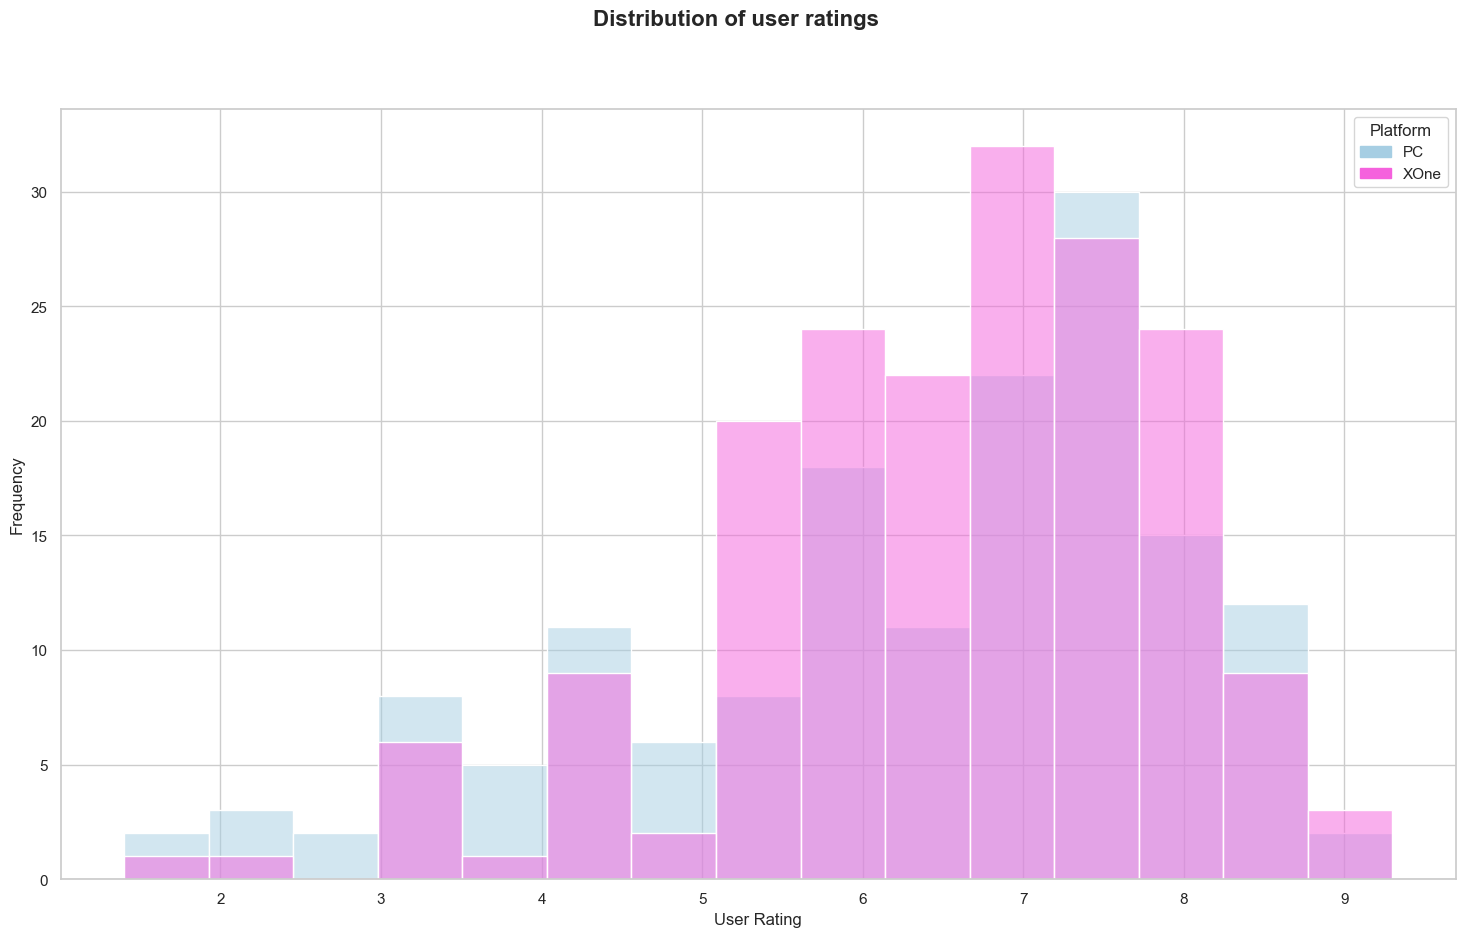

In [34]:
plot_distribution(
    data_after_year,
    hue='platform',
    subsample=['PC', 'XOne'],
    legend_title='Platform'
)

It’s clear that the distributions differ slightly. PC gamers tend to give ratings below 5 more frequently, and ratings in the 5-7 range less frequently than XOne gamers.

We can formulate the hypothesis in mathematical terms:

$ \mathsf{H}_0: \mu_1 = \mu_2 $<br>
$ \mathsf{H}_1: \mu_1 \neq \mu_2 $, где

$ \mu_1 $ - the expected value of user ratings for games on `PC` <br>
$ \mu_2 $ - the expected value of user ratings for games on `XOne`

$\alpha$ = 0.05

In [35]:
#  Determine the confidence interval (1 - alpha).
CONF_LVL = 0.95

def bootstrap_ci(sample1, sample2, *, n_trials=10_000, statistic=np.mean):
    """
    Compute the confidence interval for the difference between two samples using the bootstrap method.

    Parameters:
    sample1 (pd.Series): First sample..
    sample2 (pd.Series): Second sample.
    n_trials (int): Number of bootstrap repetitions (default 10,000).
    statistic (callable): The statistic for which the confidence interval is computed (default np.mean).

    Returns:
    A tuple representing the confidence interval.
    """
    # Creates a random number generator
    rng = np.random.default_rng()
    
    # Creates a list to store the statistic values.
    stat_distrib = []
    
    # Repeats the bootstrap process n_trials times.
    for _ in range(n_trials):
        # Selects random subsamples from the original samples.
        boot_sample1 = rng.choice(sample1, len(sample1), replace=True)
        boot_sample2 = rng.choice(sample2, len(sample2), replace=True)
        
        # Calculates the statistic for the subsamples and add it to the list.
        stat_distrib.append(statistic(boot_sample1) - statistic(boot_sample2))
    
    # Computes the confidence interval.
    result = do_some_math(stat_distrib)
    
    # Visualize the results.
    do_some_viz(result, stat_distrib)
    
    return result


def do_some_math(data):
    """
    Calculates the confidence interval from the distribution of a statistic.

    Args:
    data (list): List of statistic values.

    Returns:
    A tuple representing the confidence interval.
    """
    # Calculates the quantiles of a distribution
    left_q = (1 - CONF_LVL) / 2
    right_q = 1 - left_q
    
    # Calculates the confidence interval
    ci = np.quantile(data, [left_q, right_q])
    
    return ci


def do_some_viz(res, data):
    """
    Visualize bootstrap results.

    Args:
    res (tuple): Confidence interval.
    data (list): List of statistic values.

    Returns:
    None
    """
    # Create a plot
    fig, axs = plt.subplots(figsize=(18, 10))
    
    # Plot a histogram of the distribution of statistics
    hist = plt.hist(data, bins=62, color=COLORS['head'])
    
    # Calculate the maximum value of the histogram
    ymax = hist[0][np.argmax(hist[0])]
    
    # Add vertical lines for mean and confidence interval
    plt.vlines(np.mean(data), ymin=0, ymax=ymax+50, colors='black', 
                label=f'Mean: {np.mean(data).round(3)}')
    plt.vlines(res, ymin=0, ymax=ymax//2.5, linestyle='--', colors='black', 
                label=f'95% confidence interval: {res[0].round(3)} and {res[1].round(3)}')
    
    # Axis labels
    plt.xlabel('Stat')
    plt.ylabel('Freq')
    
    # Title
    plt.suptitle(
        'Stat distribution',  
        fontsize=16, 
        fontweight="bold"
    )
    
    # Legend
    plt.legend(loc=0)
    
    return None

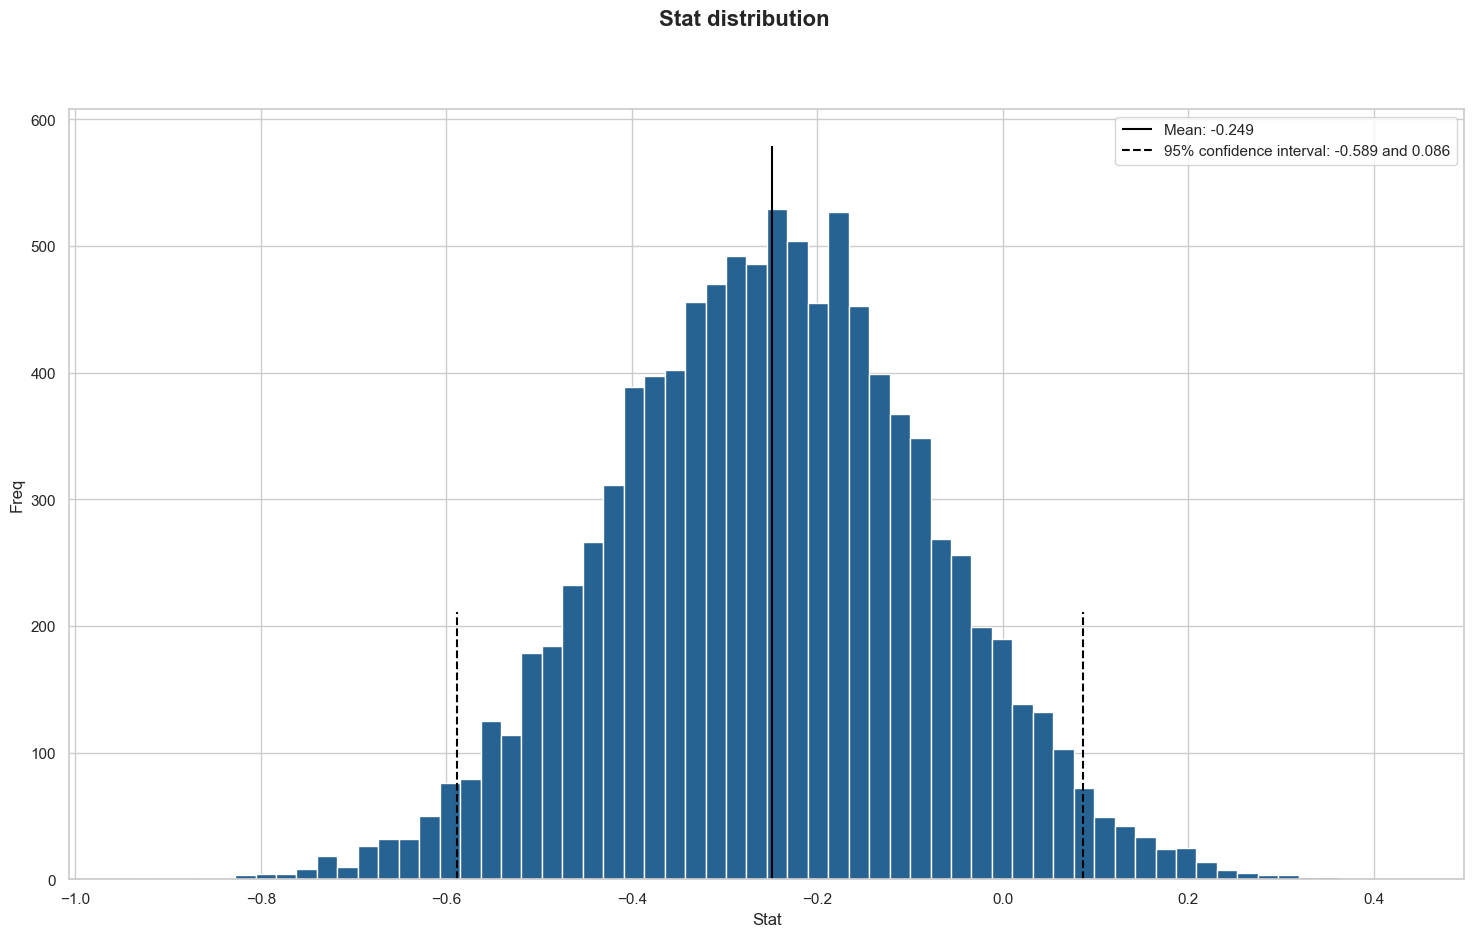

In [36]:
sample1 = data_after_year.loc[data_after_year.platform == 'PC', 'user_score'].dropna()
sample2 = data_after_year.loc[data_after_year.platform == 'XOne', 'user_score'].dropna()

ci = bootstrap_ci(sample1, sample2)

We repeated the sampling process with replacement 10,000 times, calculating the mean in each sample and computing the difference between the means. We added the statistic values to a list and obtained a distribution of the differences, where 0 falls within the 95% confidence interval. Since 0 is within the confidence interval, we cannot reject the null hypothesis that the expected user ratings for games on PC do not differ from those on XOne.

### Hypothesis: The average user ratings for Action and Sports genres are different.

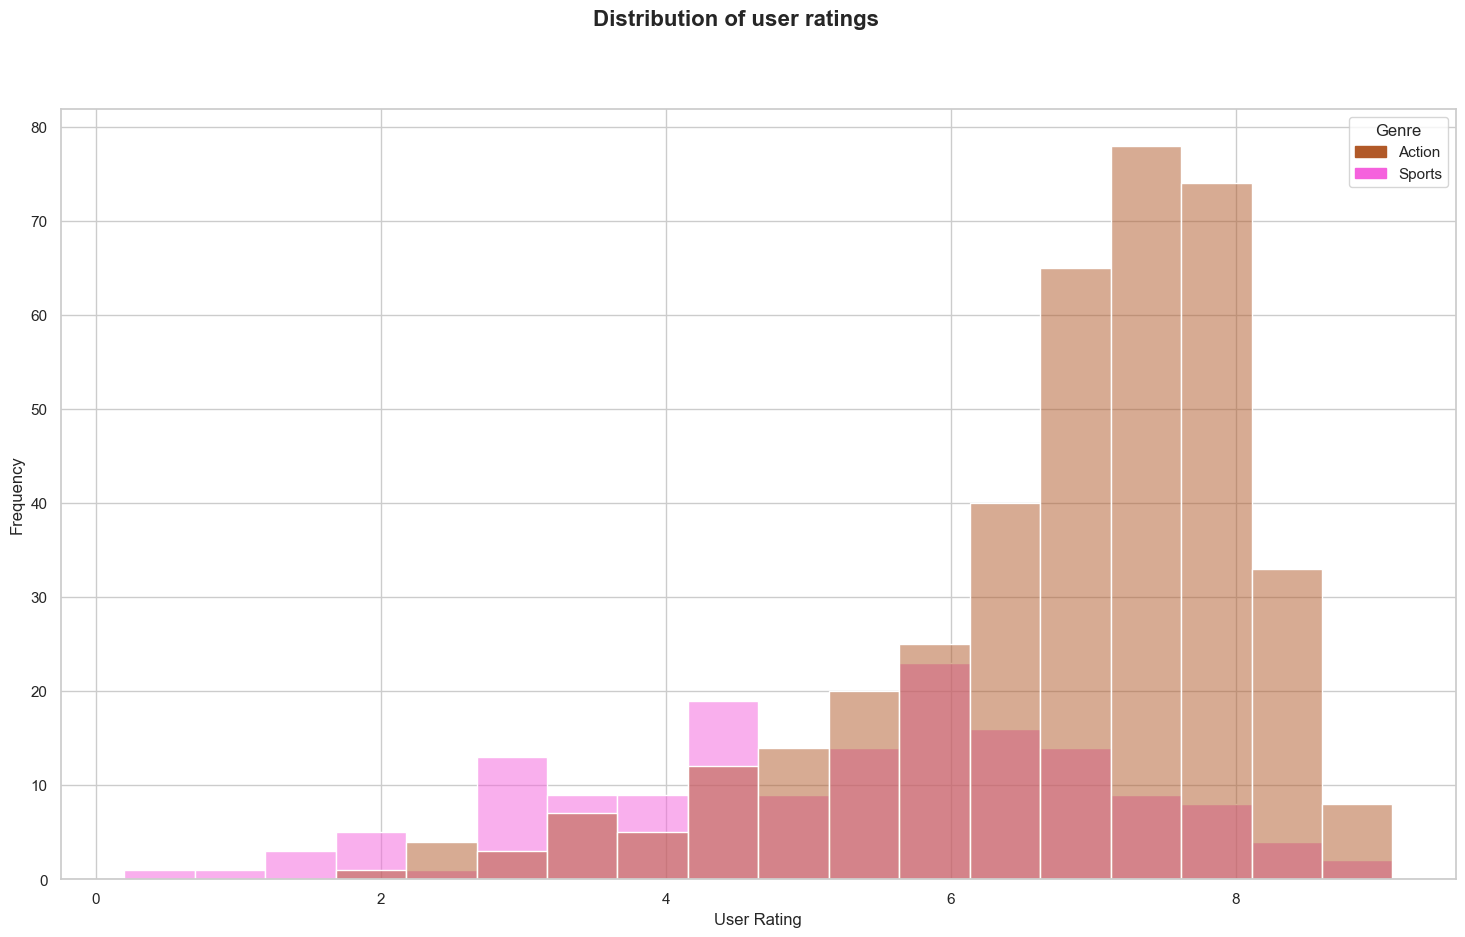

In [37]:
plot_distribution(
    data_after_year,
    hue='genre',
    subsample=['Action', 'Sports'],
    legend_title='Genre'
)

We can see that the distributions differ significantly, with users rating games in the Action genre higher. We will perform a test to determine if this difference is statistically significant.

Formulating the hypothesis:

$ \mathsf{H}_0: \mu_1 = \mu_2 $<br>
$ \mathsf{H}_1: \mu_1 \neq \mu_2 $, where

$ \mu_1 $ - the expected value of user ratings for games in the `Action` genre <br>
$ \mu_2 $ - the expected value of user ratings for games in the `Sports` genre.

$\alpha$ = 0.05

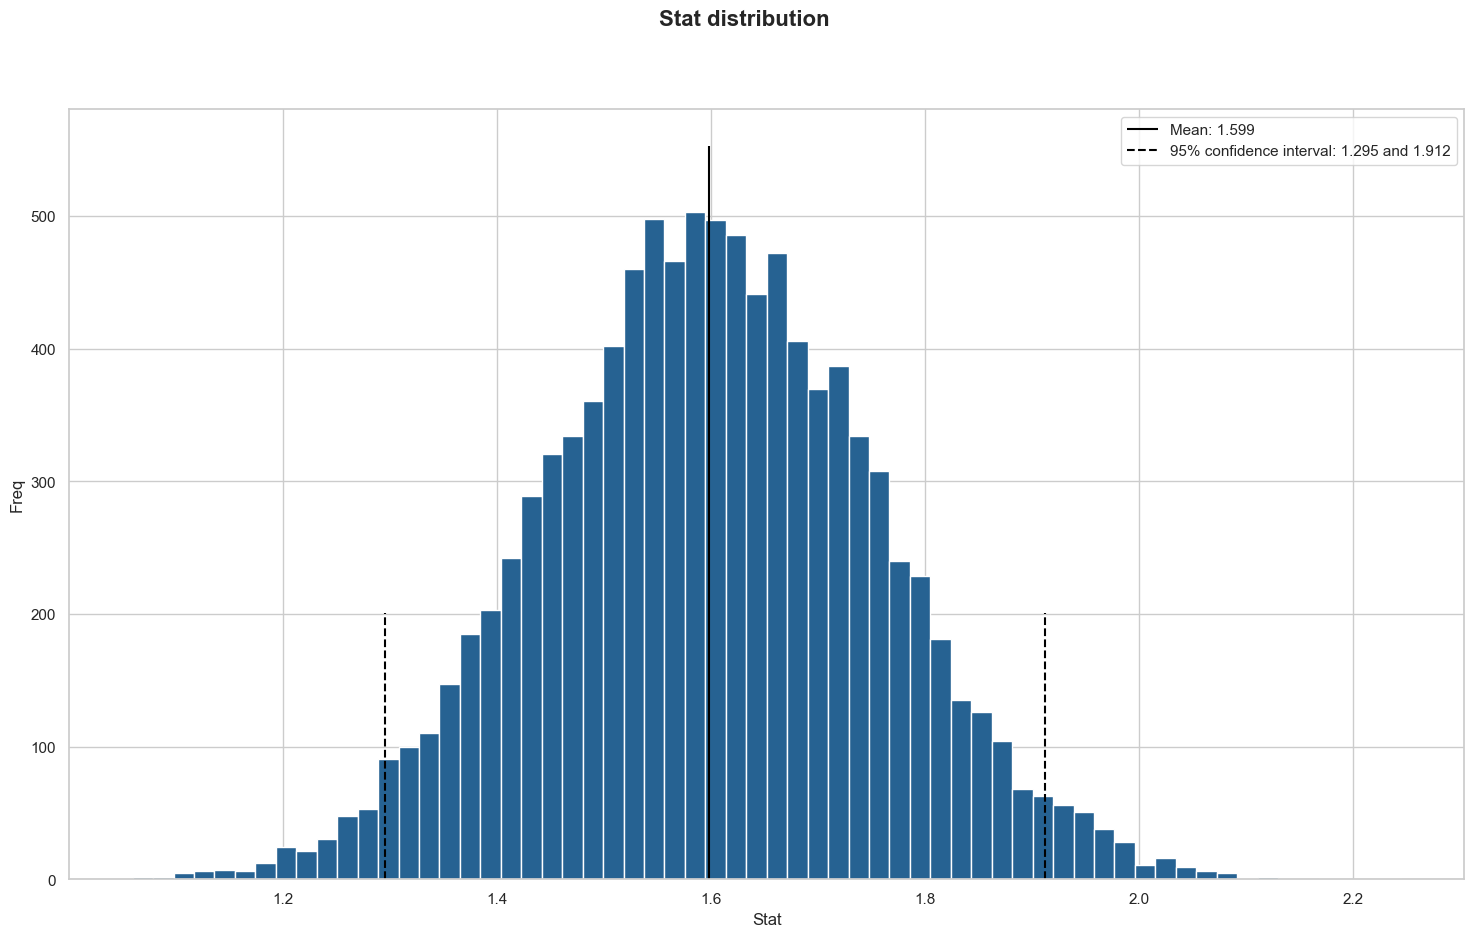

In [38]:
sample1 = data_after_year.loc[data_after_year.genre == 'Action', 'user_score'].dropna()
sample2 = data_after_year.loc[data_after_year.genre == 'Sports', 'user_score'].dropna()

ci = bootstrap_ci(sample1, sample2)

The confidence interval does not include zero. The 95% confidence interval for the difference in means is [1.295, 1.905]. This indicates that user ratings for Action games are generally higher than those for Sports games.

### Hypothesis Testing Conclusion
We found no statistically significant difference between the mean user ratings for games on PC and XOne. However, the mean user rating for Action games is significantly higher than for Sports games. The 95% confidence interval for this difference is [1.295, 1.905].

## General Conclusion
Our dataset includes games released between 1980 and 2016. The analysis shows that games are actively released for a platform for 3-5 years. The most popular platforms in recent years are PS4 and XOne. Since these consoles were released in 2013, we decided to analyze the period from 2013 to 2016. Sales on these top platforms grew in 2014 and 2015. In 2016, we observe a slight decline in game releases for PS4 and XOne, which may be due to incomplete data for that year. The sales analysis reveals that more hits are released on PS4 than on XOne. We identified a positive correlation between critic ratings and game sales. Among top-selling games, shooters, sports games, and platformers are the most common, while adventure, puzzle, and strategy games sell the least.

Japanese gamers are the most distinct from others. In Japan, the most popular console is the portable 3DS, and portable consoles, in general, are more popular in Japan than in other regions. Japanese players barely use XOne, with PS4 being the most popular home console. Role-Playing games are the best-selling genre in Japan, and fighting games are more popular there than in other regions. Over 60% of games in Japan are sold without an ESRB rating.

In Europe, PS4 is the most popular console, with XOne trailing behind by a factor of two. It's also notable that PC game sales are higher in Europe than in other regions. The top three genres in all regions except Japan are Action, Shooter, and Sports. The worst-selling genres are Puzzle, Strategy, and Adventure. The most popular ESRB rating is "M" in all regions except Japan. Over 20% of games in Europe are sold without a rating. In North America, sales of games on PS4 and XOne are nearly equal. In all other regions, PS4 dominates the market, with XOne lagging behind by more than threefold.

There is no statistically significant difference between the expected user ratings for XOne and PC games. However, the expected user ratings for games in the Action genre are higher than those in the Sports genre.

